In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from causalimpact import CausalImpact

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('volkswagen_scandal_analysis.csv',
                index_col=['Date'], parse_dates=['Date'])

In [3]:
df.head()

,VolksWagen,BMW,Allianz
Date,,,
2011-01-03,93.689651,41.970554,53.347775
2011-01-04,95.274086,41.485619,53.508320
2011-01-05,93.397766,41.000687,53.383461
2011-01-06,93.731346,40.911900,54.215897
2011-01-07,95.982895,40.508926,54.007790


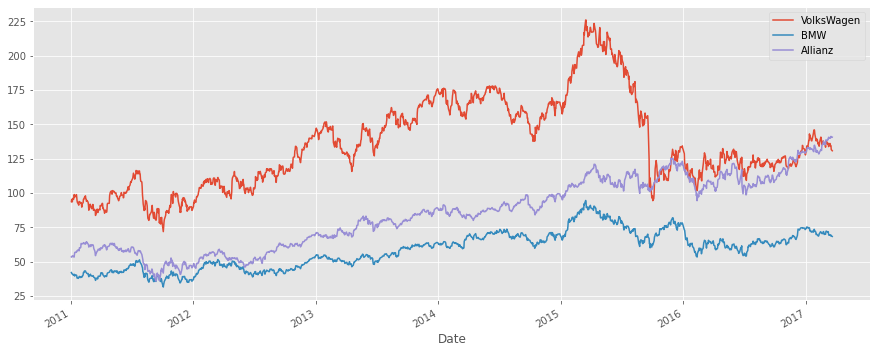

In [4]:
df.plot(figsize=(15,6));

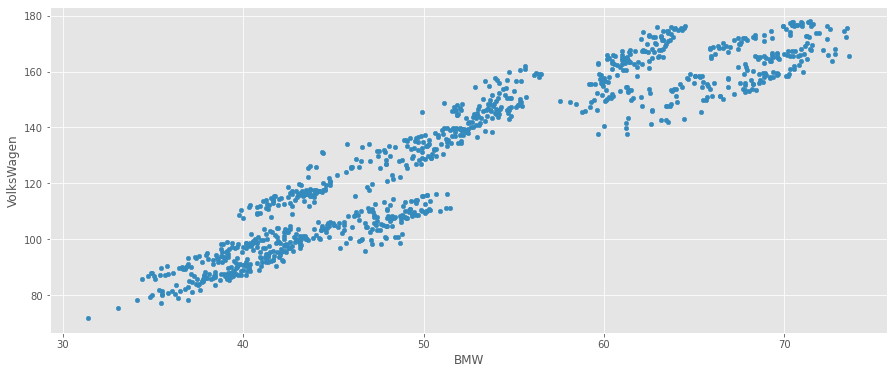

In [5]:
# prior 2015
df.loc[:"2015-01-01"].plot.scatter(x="BMW", y="VolksWagen", figsize=(15,6));

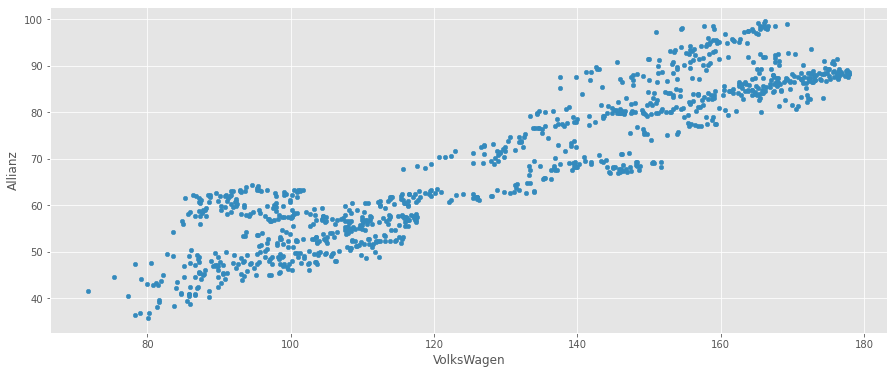

In [6]:
df.loc[:"2015-01-01"].plot.scatter(x="VolksWagen", y="Allianz", figsize=(15,6));

In [7]:
len(df.index)

1578

In [8]:
len(pd.date_range(start=df.index.min().strftime('%Y-%m-%d'), 
                  end=df.index.max().strftime('%Y-%m-%d')))

2269

In [9]:
df.loc['2015-09-01':'2015-10-01']

,VolksWagen,BMW,Allianz
Date,,,
2015-09-01,151.036697,63.476379,103.514549
2015-09-02,148.751801,63.040535,104.446114
2015-09-03,153.321609,65.108864,107.576157
2015-09-04,149.171463,63.650719,104.297066
2015-09-07,150.290588,64.142052,104.781479
2015-09-08,154.254196,66.598679,105.936600
2015-09-09,158.171188,67.787392,106.495537
2015-09-10,155.653122,68.199463,105.824814
2015-09-11,155.046936,67.779465,104.967796


In [10]:
pre_period = [df.index.min(), '2015-09-08']
post_period = ["2015-09-21", df.index.max()]

In [11]:
ciModel = CausalImpact(df, pre_period, post_period, period=[{'period':52}]) # weekly periodicity

/home/ronggolawe/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/ronggolawe/anaconda3/lib/python3.8/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: period, standardize, nseasons. After release 0.14, this will raise.
  warnings.warn(
/home/ronggolawe/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/ronggolawe/anaconda3/lib/py

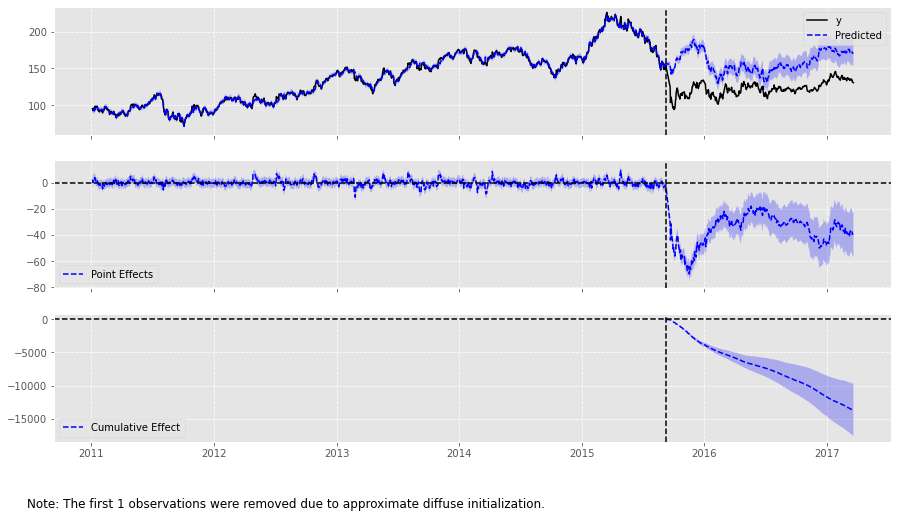

In [15]:
ciModel.plot(figsize=(15, 8))

In [13]:
print(ciModel.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    122.61             46961.14
Prediction (s.d.)         158.53 (5.27)      60718.85 (2018.56)
95% CI                    [147.92, 168.58]   [56654.17, 64566.78]

Absolute effect (s.d.)    -35.92 (5.27)      -13757.72 (2018.56)
95% CI                    [-45.97, -25.31]   [-17605.64, -9693.03]

Relative effect (s.d.)    -22.66% (3.32%)    -22.66% (3.32%)
95% CI                    [-29.0%, -15.96%]  [-29.0%, -15.96%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


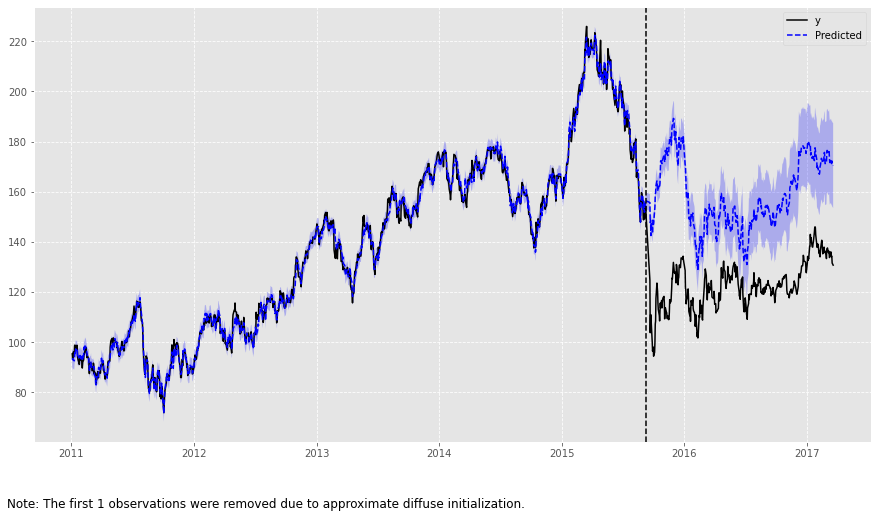

In [29]:
ciModel.plot(figsize=(15, 8), panels=["original"])